# Census Tract housing Median Price Estimator using Linear Regression
## By Yamir Encarnacion (@yencarnacion)

This Jupyter notebook uses a machine learning technique known as linear regression to learn how to calculate the
median value of a housing unit based on 80% of the data obtained from the census acs5 survey.  The model 
generated from the 80 % of the data is then applied to the remaining 20% of the data to validate
that the model generalizes.

This Jupyter Notebook was created during the HackPR 2016 which happened on 2016-10-15 thru 2016-10-16.

## License
Copyright (c) 2016, Yamir Encarnación <yencarnacion@webninjapr.com>  All Rights Reserved

This work is licensed by Yamir Encarnación <yencarnacion@webninjapr.com>
under a [Creative Commons Attribution-NonCommercial 4.0 International License 
with Clarification](https://creativecommons.org/licenses/by-nc/4.0/).  For
the purpose of this license Commercial includes the Government.

## Inspired by Chapter 2 of Hands-on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron

In [1]:
import pandas as pd
import numpy as np
import folium
import requests
from requests.auth import HTTPBasicAuth
import geopandas as gpd
import apikey
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# Getting my apikey for use with the census
key = apikey.apikey
request_url = "http://citysdk.commerce.gov"
PR_COORDINATES = (18, -66.3)

In [3]:
# The request object
request_obj = {
    "level": "county",
    "state": "PR",
    "sublevel": True,
    "variables": [
        "B25017_001E",  # total # of rooms
        "B25018_001E",  # median # of rooms
        "B25026_001E",  # Total population in occupied housing units:
        "B25032_002E",  # Owner-occupied housing units:
        "B25032_013E",  # Renter-occupied housing units:
        "B25034_001E",  # Year Structure Built
        "B25035_001E",  # Median year structure built
        "B25040_004E",  # Electricity
        "B25040_008E",  # Solar energy
        "B25041_001E",  # Total # Bedrooms
        "B25047_001E",  # PLUMBING FACILITIES FOR ALL HOUSING UNITS
        "B25047_002E",  # Complete plumbing facilities
        "B25047_003E",  # Lacking complete plumbing facilities	
        "B25051_002E",  # Complete kitchen facilities
        "B25051_003E",  # Lacking complete kitchen facilities
        "B11011_001E",  # Total HOUSEHOLD TYPE BY UNITS IN STRUCTURE
        "income",
        "income_per_capita",
        "median_home_value",
        "population"
    ],
    "api": "acs5",
    "year": "2014"
}

In [4]:
response = requests.post(request_url, auth=HTTPBasicAuth(key, None), json=request_obj)

response.json

<bound method Response.json of <Response [200]>>

In [5]:
# caching the obtained data locally
f = open('housing-features.json', 'wb')
f.write(response.text.encode('utf-8'))
f.close()

In [6]:
# converting the data into a geodataframe
housing_features = gpd.read_file('housing-features.json')

In [7]:
# Taking a look at how many results were returned
housing_features.shape

(131, 35)

In [8]:
# taking a look a the columns for the data
housing_features.columns

Index(['AREALAND', 'AREAWATER', 'B01003_001E', 'B11011_001E', 'B19013_001E',
       'B19301_001E', 'B25017_001E', 'B25018_001E', 'B25026_001E',
       'B25032_002E', 'B25032_013E', 'B25034_001E', 'B25035_001E',
       'B25040_004E', 'B25040_008E', 'B25041_001E', 'B25051_002E',
       'B25051_003E', 'B25077_001E', 'BASENAME', 'CENTLAT', 'CENTLON',
       'COUNTY', 'FUNCSTAT', 'GEOID', 'INTPTLAT', 'INTPTLON', 'LSADC', 'MTFCC',
       'NAME', 'OBJECTID', 'OID', 'STATE', 'TRACT', 'geometry'],
      dtype='object')

In [9]:
# making the data more user friendly with easy to read titles
housing_features = housing_features.rename(columns={'B01003_001E': 'total_population', 
                                 'B11011_001E': 'total_households', 
                                 'B19013_001E': 'median_household_income_past_12',
                                 'B19301_001E': 'per_capita_income_past_12',
                                 'B25017_001E': 'total_rooms',
                                 'B25018_001E': 'median_rooms',
                                 'B25026_001E': 'total_population_in_units',
                                 'B25032_002E': 'owner_occupied_units',
                                 'B25032_013E': 'renter_occupied_units',
                                 'B25034_001E': 'year_built',
                                 'B25035_001E': 'median_year_built',
                                 'B25040_004E': 'electricity',
                                 'B25040_008E': 'solar_energy',
                                 'B25041_001E': 'total_bedrooms',
                                 'B25047_001E': 'plumbing',
                                 'B25047_002E': 'complete_plumbing',
                                 'B25047_003E': 'lacking_complete_plumbing',
                                 'B25051_002E': 'complete_kitchen',
                                 'B25051_003E': 'lacking_complete_kitchen',
                                 'B11011_001E': 'households',
                                 'B25077_001E': 'median_value_unit'                                 
                                })


In [10]:
# Today I wont be using the geodata so this step eliminates it
del housing_features['geometry']


In [11]:
# Converting the geodata back to a regular Pandas DataFrame
housing_features.to_csv("housing-features-2.json", index=False)
housing_df = pd.read_csv("housing-features-2.json")
# taking a look at the first few columns 
housing_df.head()

,AREALAND,AREAWATER,total_population,households,median_household_income_past_12,per_capita_income_past_12,total_rooms,median_rooms,total_population_in_units,owner_occupied_units,renter_occupied_units,year_built,median_year_built,electricity,solar_energy,total_bedrooms,complete_kitchen,lacking_complete_kitchen,median_value_unit,BASENAME,CENTLAT,CENTLON,COUNTY,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,TRACT
0,747117,0,0,0,NaN,NaN,0,NaN,0,0,0,0,NaN,0,0,0,0,0,NaN,9801.08,18.456921,-66.099661,127,S,72127980108,18.456921,-66.099661,CT,G5020,"Census Tract 9801.08, San Juan Municipio, Puer...",244,207903709249693,72,980108
1,2839178,227869,3342,1865,42981.0,28307.0,2275,4.7,3342,1231,634,2275,1987.0,496,17,2275,2239,36,185500.0,105.00,18.429553,-66.068761,127,S,72127010500,18.430548,-66.070782,CT,G5020,"Census Tract 105, San Juan Municipio, Puerto Rico",245,207903709249699,72,10500
2,292357,452,0,0,NaN,NaN,0,NaN,0,0,0,0,NaN,0,0,0,0,0,NaN,9801.02,18.410259,-66.073207,127,S,72127980102,18.409683,-66.073118,CT,G5020,"Census Tract 9801.02, San Juan Municipio, Puer...",4360,207903709249642,72,980102
3,789892,0,2620,1097,17292.0,12656.0,1302,4.5,2618,645,452,1302,1968.0,151,0,1302,1192,110,154400.0,82.02,18.387524,-66.088261,127,S,72127008202,18.387524,-66.088261,CT,G5020,"Census Tract 82.02, San Juan Municipio, Puerto...",6257,20790588908010,72,8202
4,424762,0,2624,987,20288.0,10001.0,1242,4.6,2592,550,437,1242,1956.0,172,8,1242,1033,209,150700.0,83.00,18.398078,-66.088308,127,S,72127008300,18.398078,-66.088308,CT,G5020,"Census Tract 83, San Juan Municipio, Puerto Rico",6258,20790588915950,72,8300


In [12]:
# Cleaning up the data by:
# 1) Converting Strings to numbers so we can do some calculations with them
# 2) filling missing values 

housing_df.dropna(subset=['total_bedrooms']) 
housing_df.fillna(value=-1)
housing_df['AREALAND'] = housing_df['AREALAND'].apply(int)
housing_df['AREAWATER'] = housing_df['AREAWATER'].apply(int)
housing_df['total_population'] = housing_df['total_population'].apply(int)
#housing_df['total_households'] = housing_df['total_households'].apply(int)
housing_df=housing_df[np.isfinite(housing_df['median_household_income_past_12'])]
housing_df['median_household_income_past_12'] = housing_df['median_household_income_past_12'].apply(int)
housing_df['per_capita_income_past_12'] = housing_df['per_capita_income_past_12'].apply(int)
housing_df['total_rooms'] = housing_df['total_rooms'].apply(int)
housing_df['median_rooms'] = housing_df['median_rooms'].apply(float)
housing_df['total_population_in_units'] = housing_df['total_population_in_units'].apply(int)
housing_df['owner_occupied_units'] = housing_df['owner_occupied_units'].apply(int)
housing_df['renter_occupied_units'] = housing_df['renter_occupied_units'].apply(int)
housing_df['year_built'] = housing_df['year_built'].apply(int)
housing_df['median_year_built'] = housing_df['median_year_built'].apply(int)
housing_df['electricity'] = housing_df['electricity'].apply(int)
housing_df['solar_energy'] = housing_df['solar_energy'].apply(int)
housing_df['total_bedrooms'] = housing_df['total_bedrooms'].apply(int)
#housing_features['plumbing'] = housing_df['plumbing'].apply(int)
#housing_features['complete_plumbing'] = housing_df['complete_plumbing'].apply(int)
#housing_features['lacking_complete_plumbing'] = housing_df['lacking_complete_plumbing'].apply(int)
housing_df['complete_kitchen'] = housing_df['complete_kitchen'].apply(int)
housing_df['lacking_complete_kitchen'] = housing_df['lacking_complete_kitchen'].apply(int)
housing_df['households'] = housing_df['households'].apply(int)
housing_df=housing_df[np.isfinite(housing_df['median_value_unit'])]
housing_df['median_value_unit'] = housing_df['median_value_unit'].apply(int)                              
housing_df['CENTLAT'] = housing_df['CENTLAT'].apply(float)
housing_df['CENTLON'] = housing_df['CENTLON'].apply(float)
housing_df['INTPTLAT'] = housing_df['INTPTLAT'].apply(float)
housing_df['INTPTLON'] = housing_df['INTPTLON'].apply(float)

### Created Features
housing_df["rooms_per_household"] = housing_df["total_rooms"] / housing_df["total_population"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"] / housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["total_population"] / housing_df["households"]
#housing_df = housing_df.fillna(value=-1)

# Change if there is a significant amount of water near the housing units to a boolean (1/0)
def near_water(x):
    if(x < housing_df["AREAWATER"].describe()[6]):
        return 0
    else:
        return 1

    
housing_df["AREAWATER"] = housing_df["AREAWATER"].apply(near_water)

In [13]:
# Droping rows with no data for these variables
housing_df = housing_df[np.isfinite(housing_df["rooms_per_household"])]
housing_df = housing_df[np.isfinite(housing_df["bedrooms_per_room"])]
housing_df = housing_df[np.isfinite(housing_df["population_per_household"])]

#housing_features["rooms_per_household"]

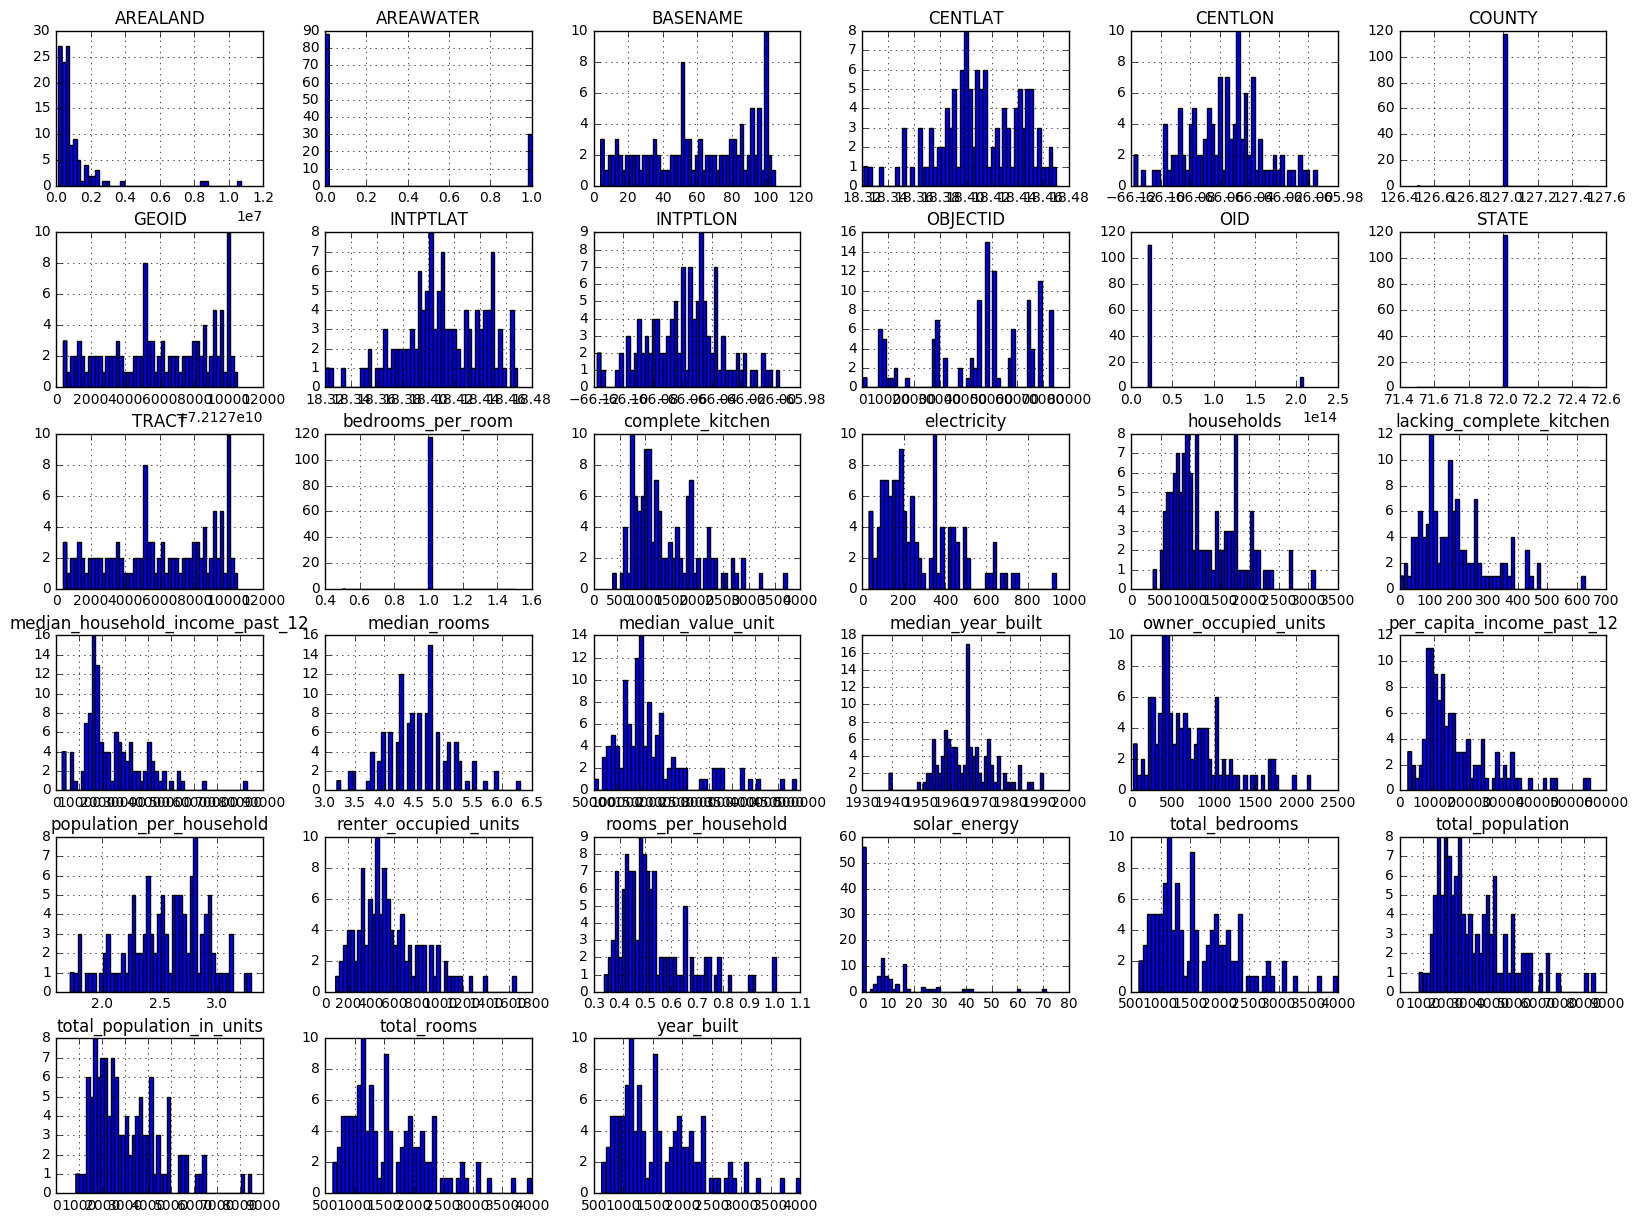

In [14]:
#ploting histograms of the numeric data so we have an idea of what is in there
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Calculating the correlation matrix so we can understand what features have the most impact when
# estimating the median value of a housing unit
corr_matrix = housing_df.corr()
corr_matrix["median_value_unit"].sort_values(ascending=False)

median_value_unit                  1.000000
per_capita_income_past_12          0.821119
median_household_income_past_12    0.673808
electricity                        0.469206
complete_kitchen                   0.306719
median_rooms                       0.304795
owner_occupied_units               0.303326
median_year_built                  0.280991
rooms_per_household                0.250341
total_rooms                        0.247377
year_built                         0.247377
total_bedrooms                     0.247377
households                         0.201664
AREALAND                           0.166629
total_population                   0.126642
solar_energy                       0.124207
total_population_in_units          0.119375
OBJECTID                           0.087554
OID                                0.008842
BASENAME                           0.007695
GEOID                              0.007695
TRACT                              0.007695
AREAWATER                       

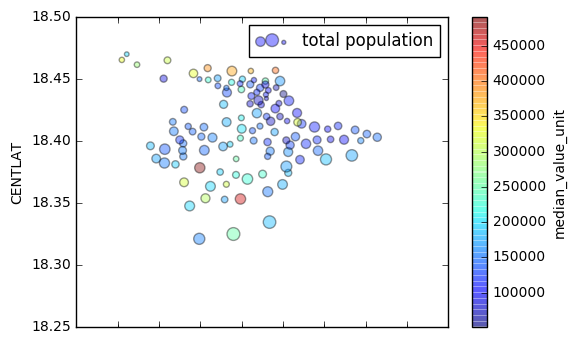

In [16]:
# From Learning IPython for Interactive Computing and Data Visualization, Second Edition pg 64-66
# By Cyrille Rossant
# ISBN 978-1-78398-698

housing_df.plot(kind="scatter", x="CENTLON", y="CENTLAT", alpha=0.4,
                s=housing_df["total_population"]/100, label="total population",
                c="median_value_unit", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

# What follows is a plot for the San Juan tract data

In [17]:
#housing_df = housing_df[np.isfinite(housing_df['median_value_unit'])]
housing_df = housing_df[np.isfinite(housing_df["rooms_per_household"])]
housing_df = housing_df[np.isfinite(housing_df["bedrooms_per_room"])]
housing_df = housing_df[np.isfinite(housing_df["population_per_household"])]

# We select the features we are going to use to learn from and put them in X_df
X_df = housing_df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'AREAWATER', 'CENTLAT', 'CENTLON', 'complete_kitchen', 'electricity', 'households', 'lacking_complete_kitchen',
         'median_household_income_past_12', 'median_rooms', 'owner_occupied_units', 'per_capita_income_past_12',
         'renter_occupied_units', 'solar_energy', 'total_bedrooms', 'total_population', 'total_population_in_units', 
         'total_rooms', 'year_built']]

X_df.shape

(118, 21)

In [18]:
# We put the expected values of the calucation in Y_df
Y_df = housing_df['median_value_unit']
Y_df.shape

(118,)

In [19]:
# We break down the X_df, Y_df matrices into a training and a test set
# The traininig set contains about 80% of the data to learn from
# The model will be validated agains the remaining 20% with the test data

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=42)

In [20]:
X = X_train.as_matrix()
X

array([[    0.36631331,     1.        ,     3.12822402, ...,
         8475.        ,  3110.        ,  3110.        ],
       [    0.44265677,     1.        ,     2.62337662, ...,
         2414.        ,  1073.        ,  1073.        ],
       [    0.50584226,     1.        ,     2.38837209, ...,
         2054.        ,  1039.        ,  1039.        ],
       ..., 
       [    0.56189047,     1.        ,     2.51509434, ...,
         1333.        ,   749.        ,   749.        ],
       [    0.60716796,     1.        ,     2.13023952, ...,
         1369.        ,   864.        ,   864.        ],
       [    0.34106802,     1.        ,     3.13034826, ...,
         3146.        ,  1073.        ,  1073.        ]])

In [21]:
Y = y_train.as_matrix()
Y.shape

(94,)

In [22]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.        
    mu = X.mean(axis=0)
    # See http://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std
    # for ddof=1 explanation
    sigma = X.std(axis=0, ddof=1)  
    numerator = X - ((np.ones( (X.shape[0],X.shape[1]) ) * mu ))
    denominator = ((np.ones( (X.shape[0],X.shape[1]) ) * sigma ))

    X_norm = numerator / denominator

    return (X_norm, mu, sigma)

In [23]:
# We normalize the data to get better results
(X_n, mu, sigma) = featureNormalize(X)
X_n= np.nan_to_num(X_n)

In [24]:
X_n = np.hstack((np.ones((X_n.shape[0],1)), X_n))

## Part 2: Gradient Descent against the training set

In [25]:
alpha = 0.01
num_iters = 400

In [26]:
def computeCostMulti(X, y, theta):
    #COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    #   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    d = ((theta.T.dot(X.T)).T-y)

    d = d * d;

    J = (1.0/(2*m))*d.sum();

    return J

In [27]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = y.shape[0] # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in np.arange(num_iters):
        d = alpha*(1.0/m)*((theta.T.dot(X.T)).T-y).T.dot(X)
        #print(theta)
        theta = theta - d.T
        
        #print (theta)
        # Save the cost J in every iteration    
        J1 = computeCostMulti(X, y, theta)
        #print(J1)
        J_history[iter] = J1
          
        #print J_history[iter]
    return (theta, J_history)


In [28]:
X_n.shape

(94, 22)

In [29]:
# Init Theta and Run Gradient Descent 
theta = np.zeros((X_n.shape[1]))
(theta, J_history) = gradientDescentMulti(X_n, Y, theta, alpha, num_iters)

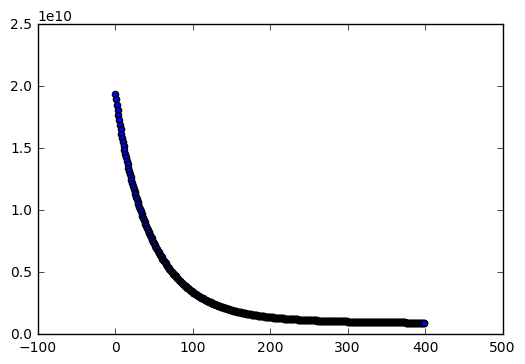

In [30]:
# plot results of Gradient Descent to verify algorithm is learning from the data
N = num_iters
xx = np.arange(N)
yy = J_history
plt.scatter(xx, yy)

In [31]:
# Display gradient descent's result
print ('Theta computed from gradient descent: \n')
print (theta)

Theta computed from gradient descent: 

[ 176069.97372979    7982.6696279        0.           10226.43300047
   -2737.56530679    9809.72114661  -10703.84863637    2209.71714605
     287.52134784   -2730.94538072  -13774.56534029   23679.20831769
    6918.71980905  -11386.87398796   49986.7357926    11679.69665411
   -5124.07969081    -128.05698099    5028.80572808    1909.87409511
    -128.05698099    -128.05698099]


## Part 3: Results

In [32]:
np.sqrt(np.square(pd.DataFrame((X_n.dot(theta.T)-Y)/Y))).describe()

,0
count,94.000000
mean,0.179824
std,0.174256
min,0.001890
25%,0.057851
50%,0.123517
75%,0.268744
max,1.016154


From the table above we can see that in one case the predictions against the traning set were 0.001890 % from the actual result.  We can also see that 25% of the results were less than 0.057851 different from the actual result and that 50% were less than 0.057851 different from the actual result.  Finally, one result wat 101.6% off

## Part 4: Validation

In [33]:
X_test = X_test.as_matrix()
(X_n_t, mu_t, sigma_t) = featureNormalize(X_test)
X_n_t= np.nan_to_num(X_n_t)

### with X_n_t

In [34]:
X_n_t = np.hstack((np.ones((X_n_t.shape[0],1)), X_n_t))

In [35]:
np.sqrt(np.square(pd.DataFrame((X_n_t.dot(theta.T)-y_test.as_matrix())/y_test.as_matrix()))).describe()

,0
count,24.000000
mean,0.199019
std,0.177020
min,0.002787
25%,0.069865
50%,0.137791
75%,0.273894
max,0.660884


From the table above we can see that in one case the predictions against the test set were 0.002787% from the actual result.  We can also see that 25% of the results were less than 0.069865% different from the actual result and that 50% were less than 0.137791% different from the actual result.  Finally, one result was 0.660884% off

In [36]:
validation = pd.DataFrame({'prediction': X_n_t.dot(theta.T), 'actual': y_test})
validation["difference"] = validation["prediction"] - validation["actual"]
validation["percent"] = validation["difference"]/validation["actual"]
validation

,actual,prediction,difference,percent
64,135300,155052.812685,19752.812685,0.145993
101,142500,150209.806191,7709.806191,0.054104
6,158000,176688.104656,18688.104656,0.118279
53,124100,132563.662462,8463.662462,0.068200
32,139300,173639.153620,34339.153620,0.246512
129,122300,82553.704850,-39746.295150,-0.324990
77,194600,255778.037288,61178.037288,0.314378
12,140500,144628.002321,4128.002321,0.029381
102,183600,157524.344761,-26075.655239,-0.142024
81,151500,163483.263096,11983.263096,0.079097


### with X_n_t2

In [37]:
X_n_t2 = (X_test - mu)/sigma
X_n_t2= np.nan_to_num(X_n_t2)

In [38]:
X_n_t2 = np.hstack((np.ones((X_n_t2.shape[0],1)), X_n_t2))

In [39]:
np.sqrt(np.square(pd.DataFrame((X_n_t2.dot(theta.T)-y_test.as_matrix())/y_test.as_matrix()))).describe()

,0
count,24.000000
mean,0.177970
std,0.125352
min,0.028984
25%,0.073959
50%,0.167469
75%,0.277859
max,0.455607


In [40]:
validation2 = pd.DataFrame({'prediction': X_n_t2.dot(theta.T), 'actual': y_test})
validation2["difference"] = validation2["prediction"] - validation2["actual"]
validation2["percent"] = validation2["difference"]/validation2["actual"]
validation2

,actual,prediction,difference,percent
64,135300,162391.348857,27091.348857,0.200232
101,142500,146985.836416,4485.836416,0.031480
6,158000,169050.740662,11050.740662,0.069941
53,124100,134096.607171,9996.607171,0.080553
32,139300,177369.599162,38069.599162,0.273292
129,122300,78200.254190,-44099.745810,-0.360587
77,194600,231115.999900,36515.999900,0.187646
12,140500,144572.211360,4072.211360,0.028984
102,183600,130069.722673,-53530.277327,-0.291559
81,151500,162907.751126,11407.751126,0.075299


## If you want to learn how to do the above and more, take a look at the Machine Learning course on Coursera taught by Andrew Ng. See [https://www.coursera.org/learn/machine-learning](https://www.coursera.org/learn/machine-learning)